# Countries with High Fertility Rate Differentials, 1960 - 2014
### Stephen McCausland and Blaise Appollinary
### November 28, 2018

### Step 1a: Planning 
#### Identify the information in the file your program will read

Each row in birth-per-woman.csv contains: 
- a country
- a country code
- an indicator name (uniform throughout file)
- an indicator code (uniform throughout file)
- a fertility rate for every year from 1960 to 2014
- a type field (we added this field)

The indicator name indicates that the numbers given for each 'year' column is the births per woman in that country in that year. Some countries have data missing for some or even all years (Andorra, Bermuda etc.) and appear to be mostly smaller countries. Some rows are not countries but are instead regions (ie Arab World, East Asia & Pacific) and some just describe different scenarios (Fragile and conflict affected situations, for example). To filter these in the program, another column was added to the original data classifying each record as either a 'C' for country or 'R' for region or other situation.

###### Research Goal:

What five countries have had the greatest increase in fertility rates since 1960 and what five countries have had the greatest decrease in fertility since 1960? (2014 figures compared to 1960 figures only) 


 

### Step 1b: Planning 
#### Write a description of what your program will produce

##### Lists:

 - Ordered list of five countries with the greatest increase in fertility rate from 1960 to 2014 (Greatest increase is first in the list)
 - Ordered list of five countries with the greatest decrease in fertility rate from 1960 to 2014 (Greatest decrease is first in the list)

##### Graphs:

 - Two bar charts of the five countries with greatest increase/decrease in fertility rate
 - Line chart showing all ten countries plus the world fertility rate
 - Pie chart showing where statistically the next 100 children in the world will be born (continents)



### Step 1c: Planning 
#### Write or draw examples of what your program will produce

The program will produce a line chart showing all ten countries (5 with greatest increase, 5 with greatest decrease) plus the world fertility rate as a benchmark. The lines will be plotted at ten year intervals except for 2014, since there is no data for 2020. The 5 with greatest increase will differ in colour from the 5 with greatest decrease. A visual sample is given below.

(I apologize for the lines in green that are difficult to see, there should be 5 in total)


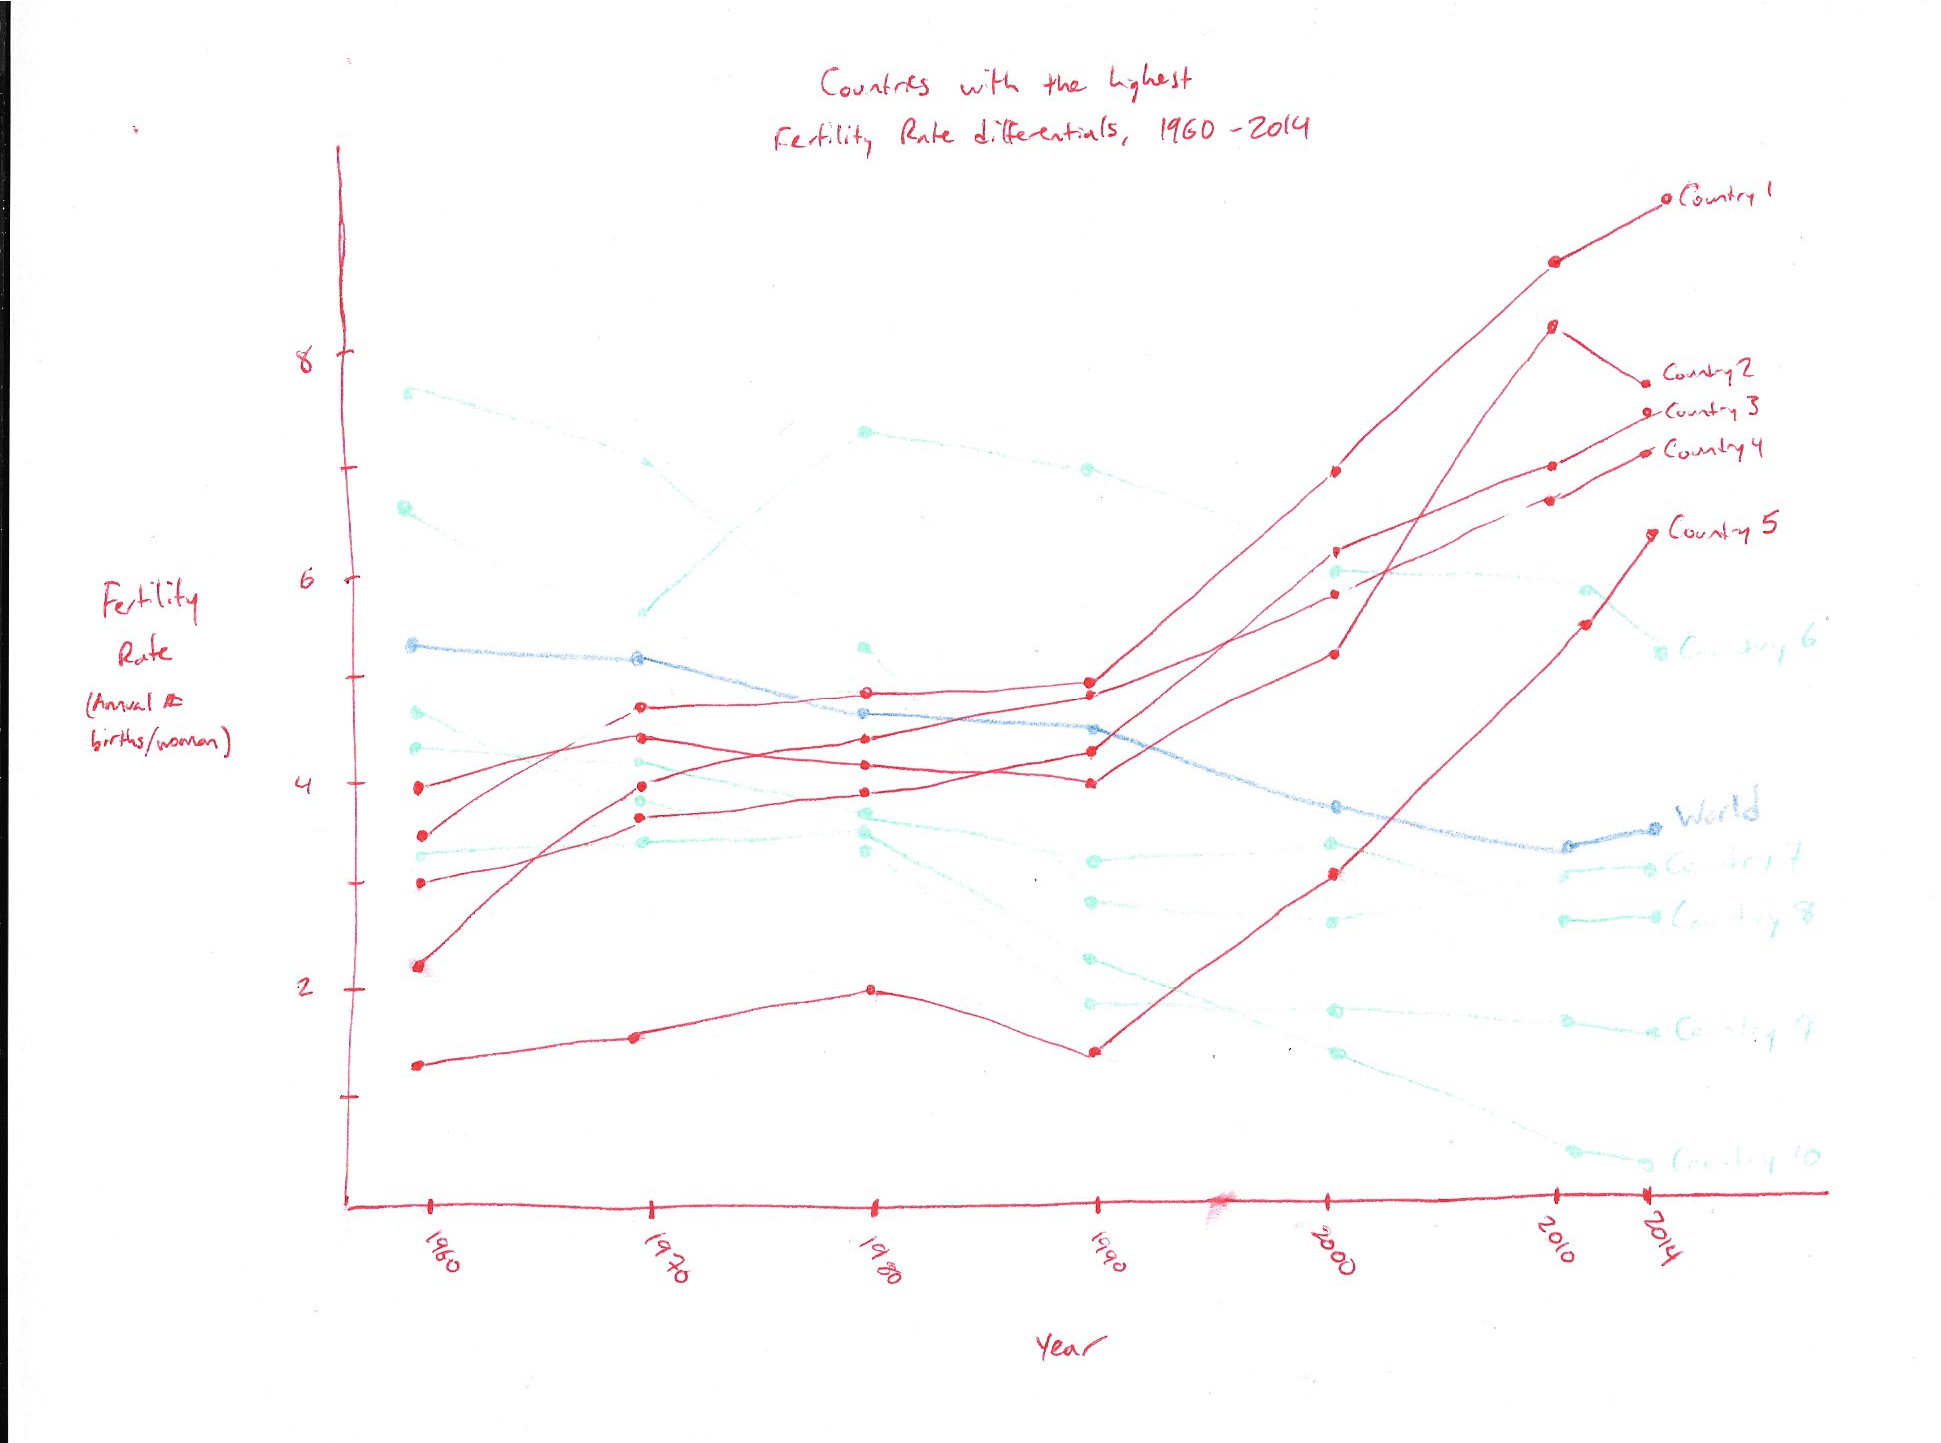




### Step 2a: Building
#### Design data definitions

##### Information Required:

 - Country name 
 - 2014 Fertility Rate for each country
 - 1960 Fertility Rate for each country
 - Fertility Rate for every ten year interval (ie, 1960, 1970, 1980...)
 - Fertility Rate differentials for each country (2014 Fertility Rate - 1960 Fertility Rate)
 
 The country name is needed to identify the country corresponding to the fertility rates.
 The 1960 and 2014 fertility rates serve as the start and end points, respectively, and form the basis for the question I am trying to solve (which countries have the highest increases/decreases between these two years).
 The ten year interval fertility rates will be used for graphing to visually demonstrate how the fertility rate has changed for each country on the graph.
 The Fertility Rate differentials are derived data that can be calculated within the program.

In [1]:
from cs103 import *
from typing import NamedTuple, List
import csv
import matplotlib.pyplot as pyplot

####################
# DATA DEFINITIONS #
####################

FertilityInfo = NamedTuple('FertilityInfo', [('country', str),
                                             ('fr60', float),  # in range [0,...]
                                             ('fr70', float),  # in range [0,...]
                                             ('fr80', float),  # in range [0,...]
                                             ('fr90', float),  # in range [0,...]
                                             ('fr00', float),  # in range [0,...]
                                             ('fr10', float),  # in range [0,...]
                                             ('fr14', float), # in range [0,...]
                                             ('difference', float)]) # in range [0,...]

# interp. Fertility rate information (Fertility rate = births per woman per year) for a given country,
#         starting at the 1960 rate (fr60) and providing rates every decade until 2010 (fr70 through fr10). 
#         The fertility rate for 2014 is also provided (fr14). Difference is given as the value (fr14 - fr60).

F1 = FertilityInfo("Spain", 2.86, 2.84, 2.2, 1.36, 1.23, 1.37, 1.27, -1.59)
F2 = FertilityInfo("Belize", 6.5, 6.299, 5.849, 4.508, 3.6, 2.714, 2.579, -3.921)

@typecheck
def fn_for_fertilityinfo(f: FertilityInfo) -> ...: # templated based on compound
    return ...(f.country,
               f.fr60,
               f.fr70,
               f.fr80,
               f.fr90,
               f.fr00,
               f.fr10,
               f.fr14,
               f.difference)


# List[FertilityInfo]
# interp. a list of Fertility Information

L0 = []
L1 = [F1,F2]

@typecheck
def fn_for_lofi(lofi: List[FertilityInfo]) -> ...: # template based on arbitrary-sized
    # description of the accumulator
    acc = ... #type: ...
    for fi in lofi:
        acc = (acc, fn_for_fertilityinfo(fi)) # reference rule
    return ...(acc)

ReadCheckFertilityInfo = NamedTuple('FertilityInfo', [('country', str),
                                             ('fr60', float),  # in range [0,...]
                                             ('fr70', float),  # in range [0,...]
                                             ('fr80', float),  # in range [0,...]
                                             ('fr90', float),  # in range [0,...]
                                             ('fr00', float),  # in range [0,...]
                                             ('fr10', float),  # in range [0,...]
                                             ('fr14', float),  # in range [0,...]
                                             ('type', str)])   # either C (country) or R (region)


# interp. Contains the same fields as FertilityInfo except for 'difference' - instead, we have a 'type' field 
#         that determines if the FertilityInfo meets the definition of a country for the purposes of this program.
#         It will be used to test the read function for NoneType values. 

F1 = ReadCheckFertilityInfo("Spain", 2.86, 2.84, 2.2, 1.36, 1.23, 1.37, 1.27, 'C')
F2 = ReadCheckFertilityInfo("Belize", 6.5, 6.299, 5.849, 4.508, 3.6, 2.714, 2.579, 'C')

@typecheck
def fn_for_rcfertilityinfo(f: ReadCheckFertilityInfo) -> ...: # templated based on compound
    return ...(f.country,
               f.fr60,
               f.fr70,
               f.fr80,
               f.fr90,
               f.fr00,
               f.fr10,
               f.fr14,
               f.type)


### Step 2b: Building
#### Design read function

## Read

In [2]:

########
# READ #
########

@typecheck
def is_country(t: str)-> bool:
    '''
    Consumes a string and returns True if it is a country and False otherwise
    '''
    #return False #stub
    #template based on atomic distinct
    if t == 'C':
        return True
    else:
        return False
    
start_testing()

expect(is_country('C'), True)
expect(is_country('R'), False)

summary()

@typecheck
def is_valid(f: ReadCheckFertilityInfo) -> bool:
    """
    Returns True if all attributes of f are populated; returns False if there is one or more 
    missing values.
    """
    # return False #stub
    # Template from atomic distinct
    if None in f:
        return False
    else:
        return True
    
@typecheck
def read(filename: str) -> List[FertilityInfo]:
    """    
    Reads information from the specified file and returns a list of FertilityInfo,
    as defined above.
    """
    # return []  #stub
    # Template from HtDAP
    # lof contains the result so far
    lof = [] # type: List[FertilityInfo]

    with open(filename) as csvfile:
        
        reader = csv.reader(csvfile)
        next(reader) # skip header line

        for row in reader:
            
            f_test = ReadCheckFertilityInfo(row[0],
                               parse_float(row[4]),
                               parse_float(row[14]),
                               parse_float(row[24]),
                               parse_float(row[34]),
                               parse_float(row[44]),
                               parse_float(row[54]),
                               parse_float(row[58]),
                               row[61])
            
            if is_valid(f_test) and is_country(f_test.type):
                a1 = parse_float(row[58])
                a2 = parse_float(row[4])
                difference = round(a1-a2, 10) # the greatest number of decimals for any entry in the csv
                                              # file is 9. Need to round to this to make the parse_float
                                              # function work for our purposes.
                
                f = FertilityInfo(row[0],
                               parse_float(row[4]),
                               parse_float(row[14]),
                               parse_float(row[24]),
                               parse_float(row[34]),
                               parse_float(row[44]),
                               parse_float(row[54]),
                               parse_float(row[58]),
                               difference) # Difference between 2014 and 1960
                lof.append(f)
            else:
                lof

    return lof

start_testing()

# Examples and tests for is_valid

RF0 = ReadCheckFertilityInfo("Andorra",None,None,None,None,None,None,None,'C')
RF00 = ReadCheckFertilityInfo("Andorra", 4.82, 2.908, 2.392, 2.249, 1.874, 1.704,None,'C')
RF3 = ReadCheckFertilityInfo("Aruba",4.82,2.908,2.392,2.249,1.874,1.704,1.675, 'C')

expect(is_valid(RF0), False)
expect(is_valid(RF00), False)
expect(is_valid(RF3), True)

# Examples and tests for read

F3 = FertilityInfo("Aruba",4.82,2.908,2.392,2.249,1.874,1.704,1.657,-3.163)
F4 = FertilityInfo("Zambia", 7.018, 7.437, 7.209, 6.502, 6.097, 5.687, 5.353, -1.665)
F5 = FertilityInfo("Zimbabwe", 7.158, 7.417, 7.095, 5.176, 4.065, 4.048, 3.923, -3.235)

expect(read("births-per-woman-t1.csv"), [F3]) 
expect(read("births-per-woman-t2.csv"), [F4, F5])

summary()

2 of 2 tests passed
5 of 5 tests passed


## Analyze_Increase

In [3]:
####################
# ANALYZE INCREASE #
####################

#  - - - Examples - - - 

F1 = FertilityInfo("Spain", 2.86, 2.84, 2.2, 1.36, 1.23, 1.37, 1.27, -1.59)
F2 = FertilityInfo("Belize", 6.5, 6.299, 5.849, 4.508, 3.6, 2.714, 2.579, -3.921)
F3 = FertilityInfo("Aruba", 4.82, 2.908, 2.392, 2.249, 1.874, 1.704, 1.657, -3.163)
F4 = FertilityInfo("Zambia", 7.018, 7.437, 7.209, 6.502, 6.097, 5.687, 5.353, -1.665)
F5 = FertilityInfo("Zimbabwe", 7.158, 7.417, 7.095, 5.176, 4.065, 4.048, 3.923, -3.235)
F6 = FertilityInfo("TestCountry1", 6.0,0.0,0.0,0.0,0.0,0.0,10.0,4.0)
F7 = FertilityInfo("TestCountry2", 6.0,0.0,0.0,0.0,0.0,0.0,10.0,-3.921)
F8 = FertilityInfo("TestCountry3", 6.0,0.0,0.0,0.0,0.0,0.0,10.0,-4.0)

L1 = [F1,F2,F3,F4,F5,F6,F7,F8]

@typecheck
def less_than_5(lof: List[FertilityInfo]) -> bool:
    """
    Returns true if the length of the list is less than 5; returns false if 5 or greater
    """
    # return False #stub
    # template from atomic distinct
    if len(lof) < 5:
        return True
    else:
        return False

start_testing()

expect(less_than_5([F1,F2,F3,F4,F5]),False)
expect(less_than_5([]),True)
expect(less_than_5([F1,F2,F3,F4,F5,F6]),False)

summary()

@typecheck
def is_in_top5(lofi: List[FertilityInfo], f: FertilityInfo) -> bool:
    """
    Takes in a list of 5 fertilityinfo data, checks if f.difference is greater than the differences 
    for each list member and returns True if f.difference is greater than any of the list members'
    differences.
    """
    # return False #stub
    # Template from atomic distinct
    if less_than_5(lofi):
        return True
    else:
        for fi in lofi:
            if f.difference > fi.difference:
                return True
            else:
                lofi
            
    return False
    
start_testing()

expect(is_in_top5([],F3), True)
expect(is_in_top5([F1,F2,F3],F8), True)
expect(is_in_top5([F1,F2,F3,F4,F5],F6), True)
expect(is_in_top5([F1,F2,F3,F4,F5],F7), False)
expect(is_in_top5([F1,F2,F3,F4,F5],F8), False)

summary()

@typecheck
def analyze_increase(lof: List[FertilityInfo]) -> List[FertilityInfo]:
    """
    Consumes the list read into the program by read and filters the top 5 countries with greatest fertility
    rate increases.
    """
    # return lof #stub
    # Template from arbitrary sized
    # filtered stores the top 5 highest increases so far
    filtered = [] #type: List[FertilityInfo]
    
    for f in lof:
        if is_in_top5(filtered, f) and less_than_5(filtered):
            filtered.append(f)
        elif is_in_top5(filtered, f):
            filtered.append(f)
            filtered = sorted(filtered, 
                           key=lambda finfo: finfo.difference, reverse=True)   # Sorts top 5 FIs in 
                                                                               # descending order of their 
                                                                               # difference
            filtered.pop()  # Remove the last item of the list
        else:
            filtered
            
    return filtered
            
start_testing()

# Examples and tests for analyze_increase

L2 = [F1,F2,F3]

expect(analyze_increase([]),[])
expect(analyze_increase(L1),[F6,F1,F4,F3,F5])
expect(analyze_increase(L2),[F1,F2,F3])

summary()

3 of 3 tests passed
5 of 5 tests passed
3 of 3 tests passed


## Analyze_Decrease

In [4]:
####################
# ANALYZE DECREASE #
####################


@typecheck
def is_in_top5_decrease(lofi: List[FertilityInfo], f: FertilityInfo) -> bool:
    """
    Takes in a list of 5 fertilityinfo data, checks if f.difference is lesser than the differences 
    for each list member and returns True if f.difference is lesser than any of the list members'
    differences.
    """
    # return True #stub
    # Template from atomic distinct
    if less_than_5(lofi):
        return True
    else:
        for fi in lofi:
            if f.difference < fi.difference:
                return True
            else:
                return False
    
start_testing()

expect(is_in_top5_decrease([],F3), True)
expect(is_in_top5_decrease([F1,F2,F3],F8), True)
expect(is_in_top5_decrease([F1,F2,F3,F4,F5],F6), False)
expect(is_in_top5_decrease([F1,F2,F3,F4,F5],F7), True)
expect(is_in_top5_decrease([F1,F2,F3,F4,F5],F8), True)

summary()

#F1 = FertilityInfo("Spain", 2.86, 2.84, 2.2, 1.36, 1.23, 1.37, 1.27, -1.59)
#F2 = FertilityInfo("Belize", 6.5, 6.299, 5.849, 4.508, 3.6, 2.714, 2.579, -3.921)
F3 = FertilityInfo("Aruba", 4.82, 2.908, 2.392, 2.249, 1.874, 1.704, 1.657, -3.163)
F4 = FertilityInfo("Zambia", 7.018, 7.437, 7.209, 6.502, 6.097, 5.687, 5.353, -1.665)
F5 = FertilityInfo("Zimbabwe", 7.158, 7.417, 7.095, 5.176, 4.065, 4.048, 3.923, -3.235)
F6 = FertilityInfo("TestCountry1", 6.0,0.0,0.0,0.0,0.0,0.0,10.0,4.0)
F7 = FertilityInfo("TestCountry2", 6.0,0.0,0.0,0.0,0.0,0.0,9.0,-5.0)
F8 = FertilityInfo("TestCountry4", 6.0,0,0,0,0,0,0,-6.0)

L1 = [F1,F2,F3,F4,F5,F6,F7,F8]


@typecheck
def analyze_decrease(lof: List[FertilityInfo]) -> List[FertilityInfo]:
    """
    Consumes the list read into the program by read and filters the top 5 countries with greatest fertility
    rate decreases.
    """
    # return lof #stub
    # Template from arbitrary sized
    # filtered stores the top 5 highest decreases seen so far
    filtered = [] #type: List[FertilityInfo]
    for f in lof:
        if is_in_top5_decrease(filtered, f) and less_than_5(filtered):
            filtered.append(f)
        elif is_in_top5_decrease(filtered, f):
            filtered.append(f)
            filtered=sorted(filtered, 
                            key=lambda x: x.difference)                        # Sorts top 5 FIs in 
                                                                               # ascending order of their 
                                                                               # difference
            filtered.pop()  # Remove the last item of the list
        else:
            filtered
            
    return filtered
            
start_testing()

expect(analyze_decrease([]),[])
expect(analyze_decrease(L1),[F8,F7,F2,F5,F3])
expect(analyze_decrease(L2),[F1,F2,F3])

summary()

5 of 5 tests passed
3 of 3 tests passed


## Plot and Helpers

2 of 2 tests passed
3 of 3 tests passed
3 of 3 tests passed
3 of 3 tests passed


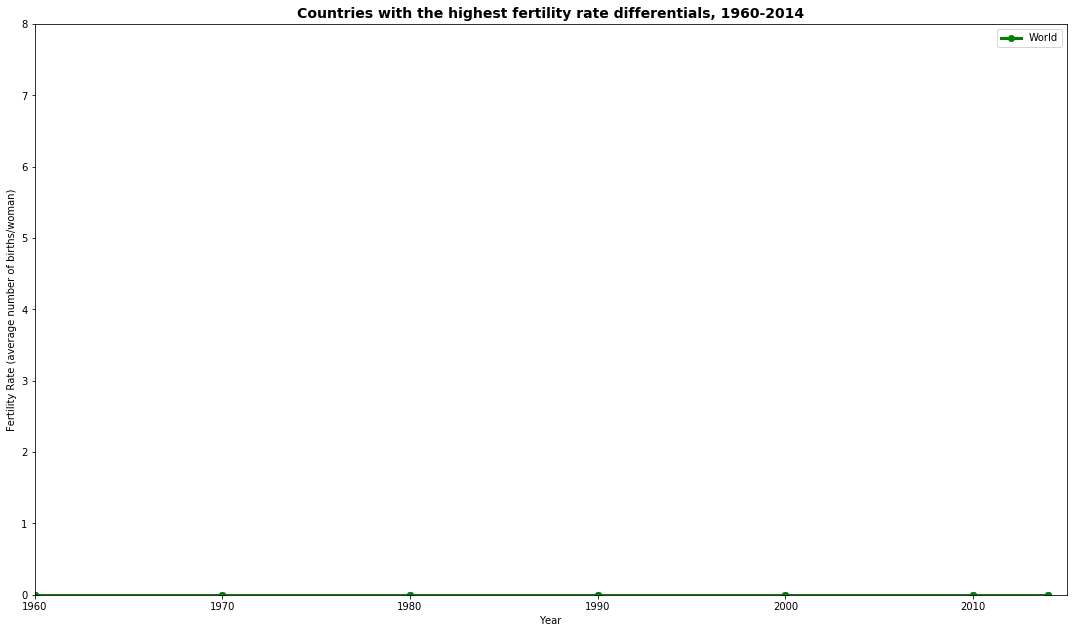

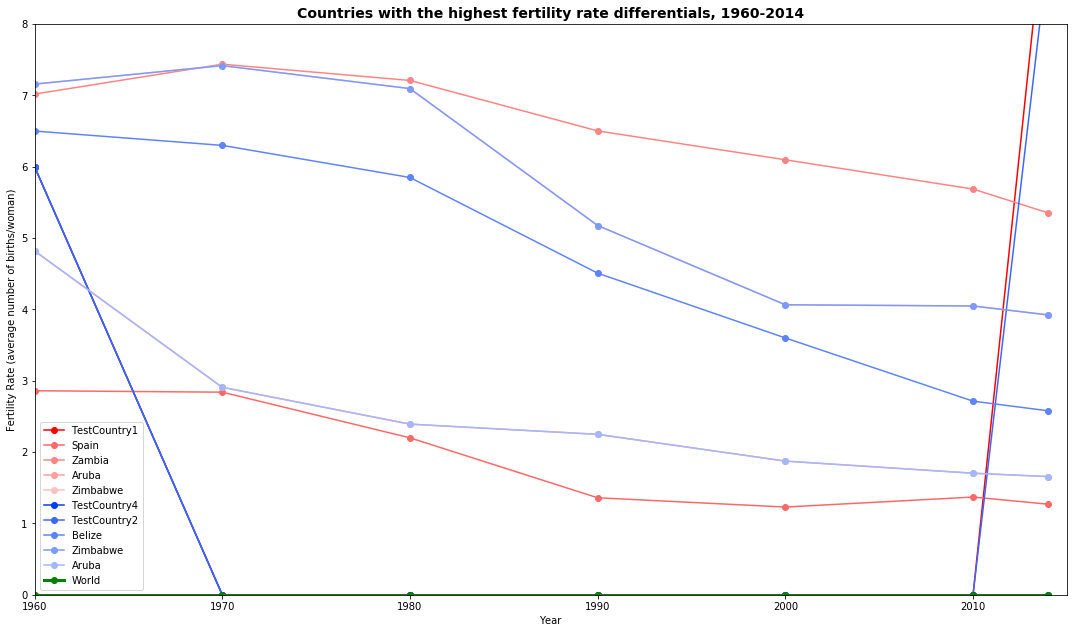

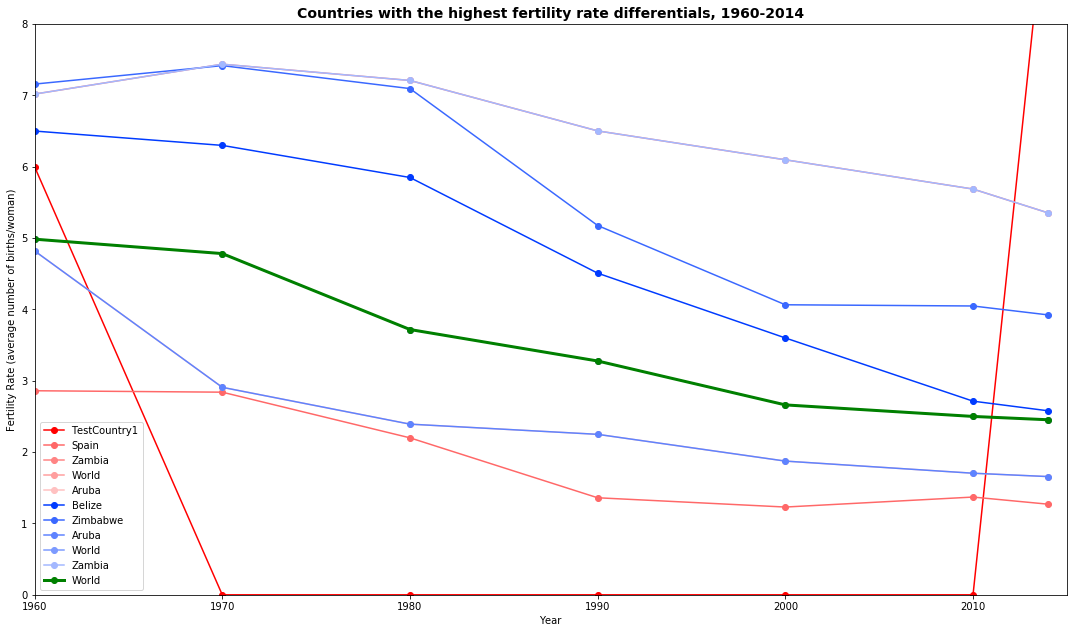

3 of 3 tests passed


In [5]:
##############
# PLOT GRAPH #
##############

FW = FertilityInfo("World",4.984411656,4.78246014,3.718129166,3.27706505,2.661576465,
                                    2.500018303,2.453320818,-2.531090838)
L3 = [F1,F2,F3,F4,F5,FW,F6]
null = FertilityInfo('',0,0,0,0,0,0,0,0)

@typecheck
def get_world(lof: List[FertilityInfo]) -> FertilityInfo:
    """
    Scans the list read into the program and selects the record of FertilityInfo for the world.
    """
    # return FertilityInfo("TestCountry1", 6.0,0.0,0.0,0.0,0.0,0.0,10.0,4.0) #stub
    # Template from arbitrary sized with no accumulator, since only need one FertilityInfo. 
    for f in lof:
        if f.country == "World":
            return f
        else:
            lof
    return FertilityInfo('',0,0,0,0,0,0,0,0)

start_testing()

expect(get_world(L1),null)
expect(get_world(L3),FW)

summary()

@typecheck
def get_c(lof: List[FertilityInfo], n: int) -> FertilityInfo:
    """
    Takes in a list of countries' fertility rate information as well as an index (n) and returns the 
    country at that index.
    """
    # return FertilityInfo('',0,0,0,0,0,0,0,0) #stub
    # Template from atomic non-distinct
    if lof == []:
        return FertilityInfo('',0,0,0,0,0,0,0,0)
    else:
        return lof[n]

start_testing()

expect(get_c([],2),null)
expect(get_c(L3,0),F1)
expect(get_c(L1,5),F6)

summary()

@typecheck
def get_c_name(f: FertilityInfo) -> str:
    """
    Takes a country's FertilityInfo and gives the name of the country.
    """
    #return '' #stub
    # template from atomic non-distinct
    return f.country

start_testing()

expect(get_c_name(null), '')
expect(get_c_name(F1), "Spain")
expect(get_c_name(F2), "Belize")

summary()


@typecheck
def get_y(f: FertilityInfo) -> List[float]:
    """
    Takes a country's FertilityInfo and turns it into a list of y values for the graph,
    corresponding to each year plotted.
    """
    # return [] #stub
    # Template from compound
    return [f.fr60,f.fr70,f.fr80,f.fr90,f.fr00,f.fr10,f.fr14]

start_testing()

#F1 = FertilityInfo("Spain", 2.86, 2.84, 2.2, 1.36, 1.23, 1.37, 1.27, -1.59)
#F2 = FertilityInfo("Belize", 6.5, 6.299, 5.849, 4.508, 3.6, 2.714, 2.579, -3.921)
expect(get_y(F1),[2.86,2.84,2.2,1.36,1.23,1.37,1.27])
expect(get_y(F2),[6.5,6.299,5.849, 4.508, 3.6, 2.714, 2.579])
expect(get_y(null),[0,0,0,0,0,0,0])

summary()


@typecheck
def plot_fr_differentials(lof: List[FertilityInfo]) -> None:
    """
    Takes in a list of fertility data, analyzes it to determine the countries with top 5 increase and 
    decrease in fertility rates from 1960 to 2014, and then plots 11 lines: the 5 countries with greatest increase, 
    the 5 countries with the greatest decrease, and the world fertility rate over time. X axis will be year 
    and Y axis will be fertility rate (births per woman) for each country.
    """
    # return None #stub
    # Template from visualization
    
    # Get each top 5 list
    T5I = analyze_increase(lof) # List[FertilityInfo]
    T5D = analyze_decrease(lof) # List[FertilityInfo]
    
    # Get y values for countries with increase: List[float]
    ci1 = get_y(get_c(T5I, 0))
    ci2 = get_y(get_c(T5I, 1))
    ci3 = get_y(get_c(T5I, 2))
    ci4 = get_y(get_c(T5I, 3))
    ci5 = get_y(get_c(T5I, 4))
    
    # Get y values for countries with decrease: List[float]
    cd1 = get_y(get_c(T5D, 0))
    cd2 = get_y(get_c(T5D, 1))
    cd3 = get_y(get_c(T5D, 2))
    cd4 = get_y(get_c(T5D, 3))
    cd5 = get_y(get_c(T5D, 4))
    
    # Get World data: List[float]
    w = get_y(get_world(lof))
    
    # Get country names for the labels: str
    cn1 = get_c_name(get_c(T5I, 0))
    cn2 = get_c_name(get_c(T5I, 1))
    cn3 = get_c_name(get_c(T5I, 2))
    cn4 = get_c_name(get_c(T5I, 3))
    cn5 = get_c_name(get_c(T5I, 4))
    cn6 = get_c_name(get_c(T5D, 0))
    cn7 = get_c_name(get_c(T5D, 1))
    cn8 = get_c_name(get_c(T5D, 2))
    cn9 = get_c_name(get_c(T5D, 3))
    cn10 = get_c_name(get_c(T5D, 4))
    wn = get_c_name(get_world(lof))
    
    # Years (1960 - 2014) as x-values
    year = [1960,1970,1980,1990,2000,2010,2014]
    
    # Label the graph
    pyplot.xlabel("Year")
    pyplot.ylabel("Fertility Rate (average number of births/woman)")
    pyplot.title("Countries with the highest fertility rate differentials, 1960-2014", fontsize=14,
                fontweight=800)
    pyplot.axis([1960,2015,0,8])
    
    # Plot all 11 lines
    inc_1 = pyplot.plot(year,ci1)
    inc_2 = pyplot.plot(year,ci2)
    inc_3 = pyplot.plot(year,ci3)
    inc_4 = pyplot.plot(year,ci4)
    inc_5 = pyplot.plot(year,ci5)
    
    dec_1 = pyplot.plot(year,cd1)
    dec_2 = pyplot.plot(year,cd2)
    dec_3 = pyplot.plot(year,cd3)
    dec_4 = pyplot.plot(year,cd4)
    dec_5 = pyplot.plot(year,cd5)
    
    world_fr = pyplot.plot(year,w)
    
    # Set properties for each line. Countries with increase should be shades of red colors with the greatest increase as the
    # darkest, least increase the lightest. Same with countries of decrease but with blue instead of red. Make the world
    # fertility rate green to differentiate from the other lines.
    
    pyplot.setp(inc_1, color='#ff0000', marker='o', label=cn1)
    pyplot.setp(inc_2, color="#ff6868", marker='o', label=cn2)
    pyplot.setp(inc_3, color="#ff8484", marker='o', label=cn3)
    pyplot.setp(inc_4, color="#ff9e9e", marker='o', label=cn4)
    pyplot.setp(inc_5, color="#ffc1c1", marker='o', label=cn5)
    
    pyplot.setp(dec_1, color="#003bff", marker='o', label=cn6)
    pyplot.setp(dec_2, color="#3a68ff", marker='o', label=cn7)
    pyplot.setp(dec_3, color="#5e83ff", marker='o', label=cn8)
    pyplot.setp(dec_4, color="#7c9aff", marker='o', label=cn9)
    pyplot.setp(dec_5, color="#a3b8ff", marker='o', label=cn10)
    
    pyplot.setp(world_fr, color="g", linewidth=3, marker='o', label="World")
    
    # Legend allows us to see which countries are which
    pyplot.legend()
    
    # Make the graph a larger image
    fig = pyplot.gcf()
    fig.set_size_inches(18.5, 10.5)
    
    pyplot.show()
    
    return None

start_testing()

# Examples and tests for plot_fr_differentials

# Should produce an empty graph with x-axis 'Year', y-axis 'Fertility Rate (average number of births/woman)',
# and title 'Countries with the highest fertility rate differentials, 1960-2014'
expect(plot_fr_differentials([]),None) # EXAMPLE 1

# See sketches in following markdown cell for next two examples

# Example without world in list
expect(plot_fr_differentials(L1),None) # EXAMPLE 2

# Example with world in list
expect(plot_fr_differentials(L3),None) # EXAMPLE 3

summary()



## Scanned Examples for plot_fr_differentials

Example 1 should look like this (since all lines are null lines):

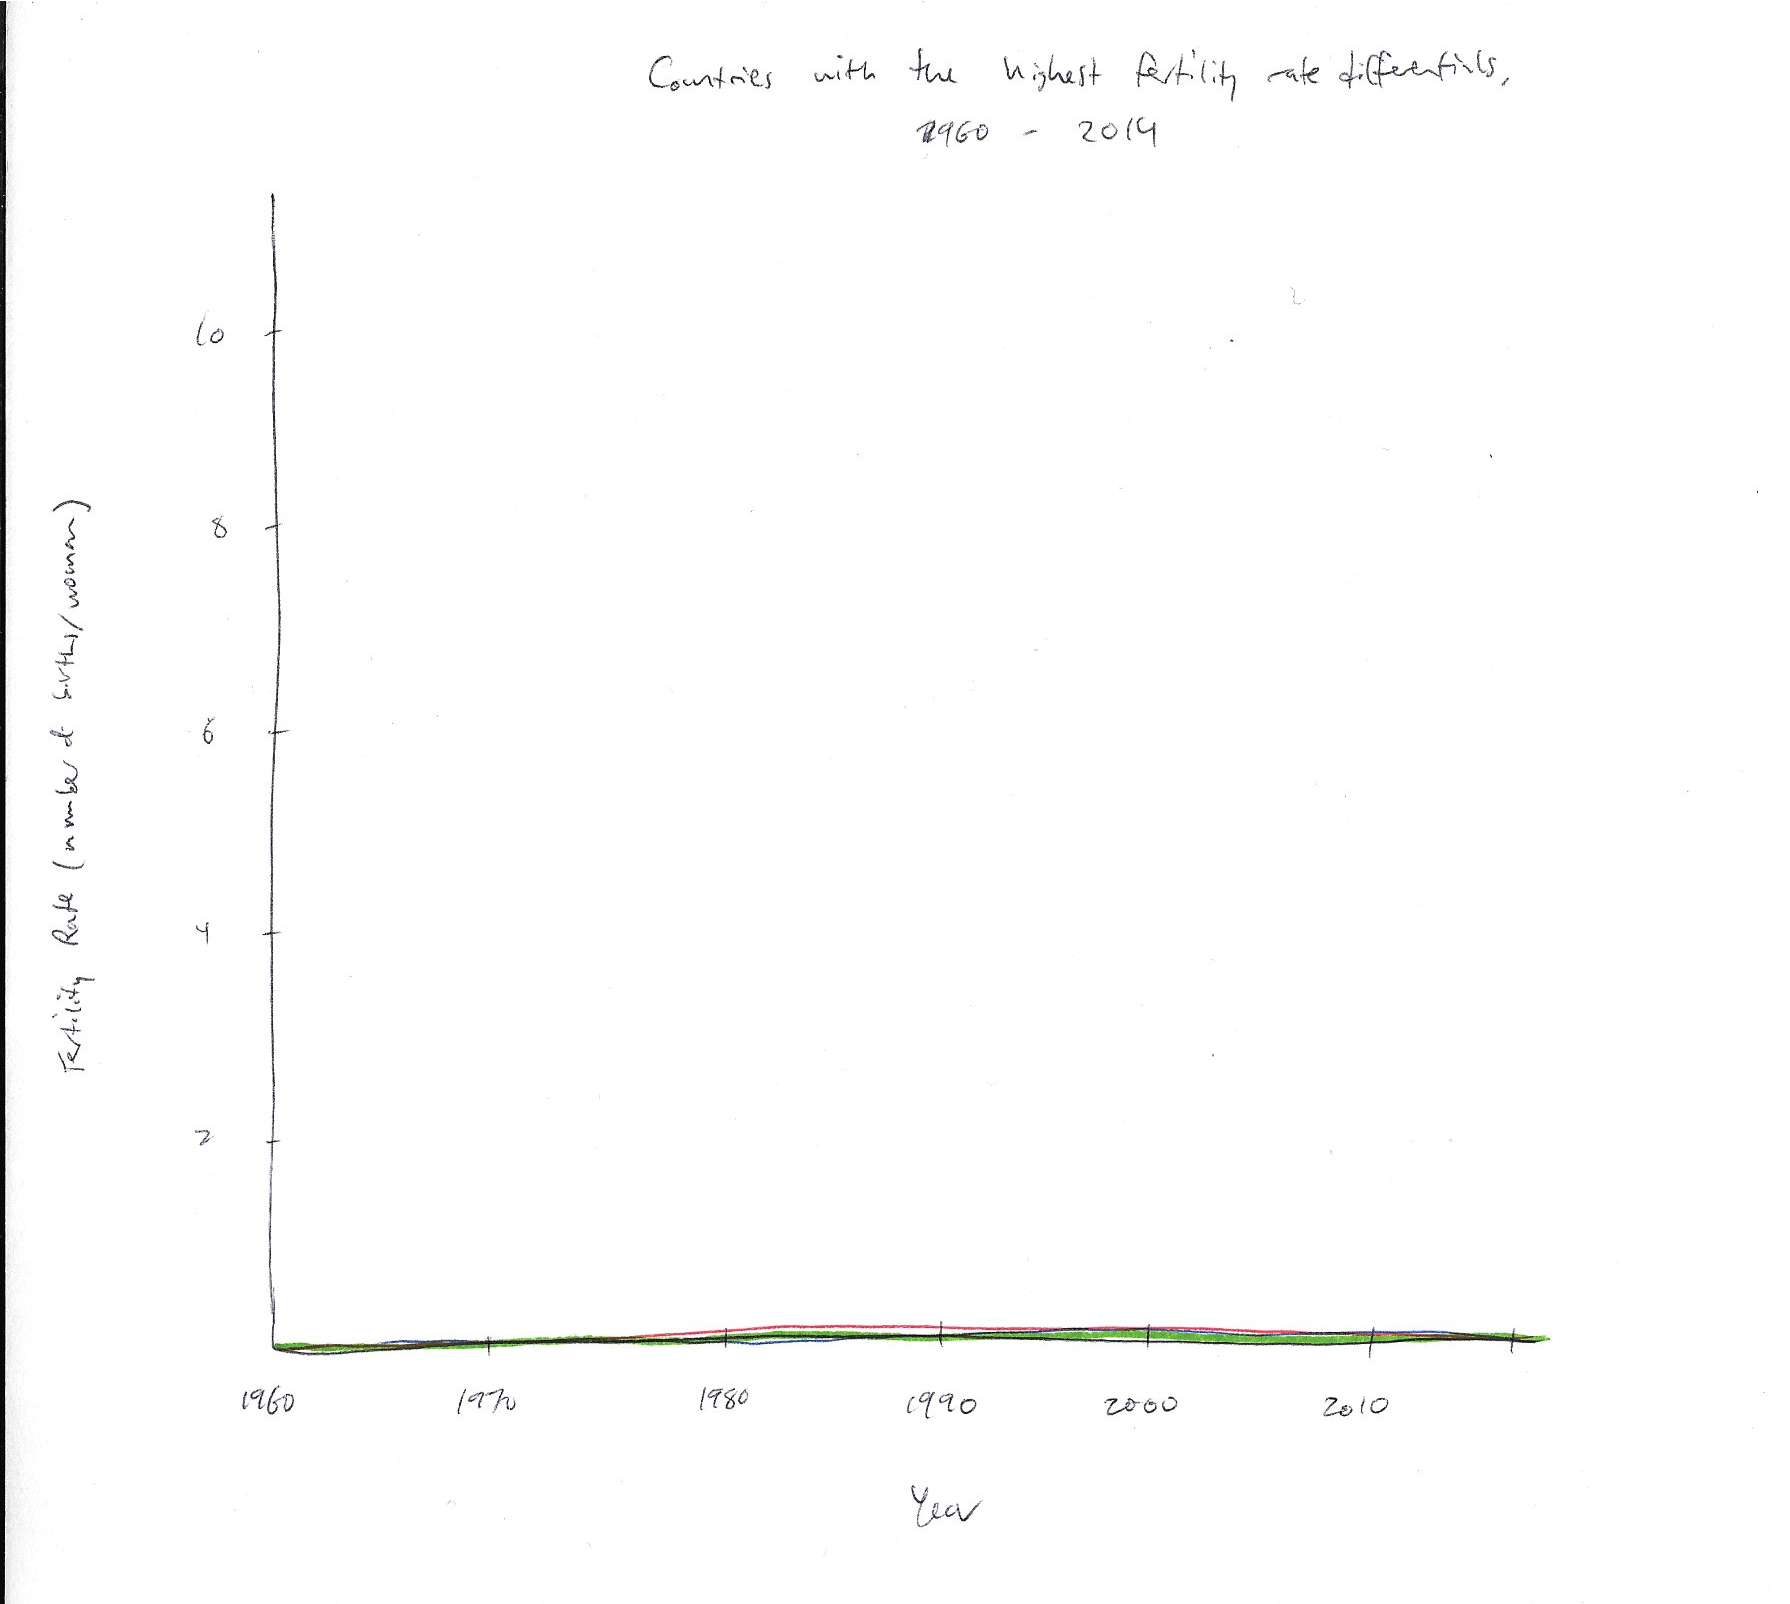

Example 2 should be similar to this:

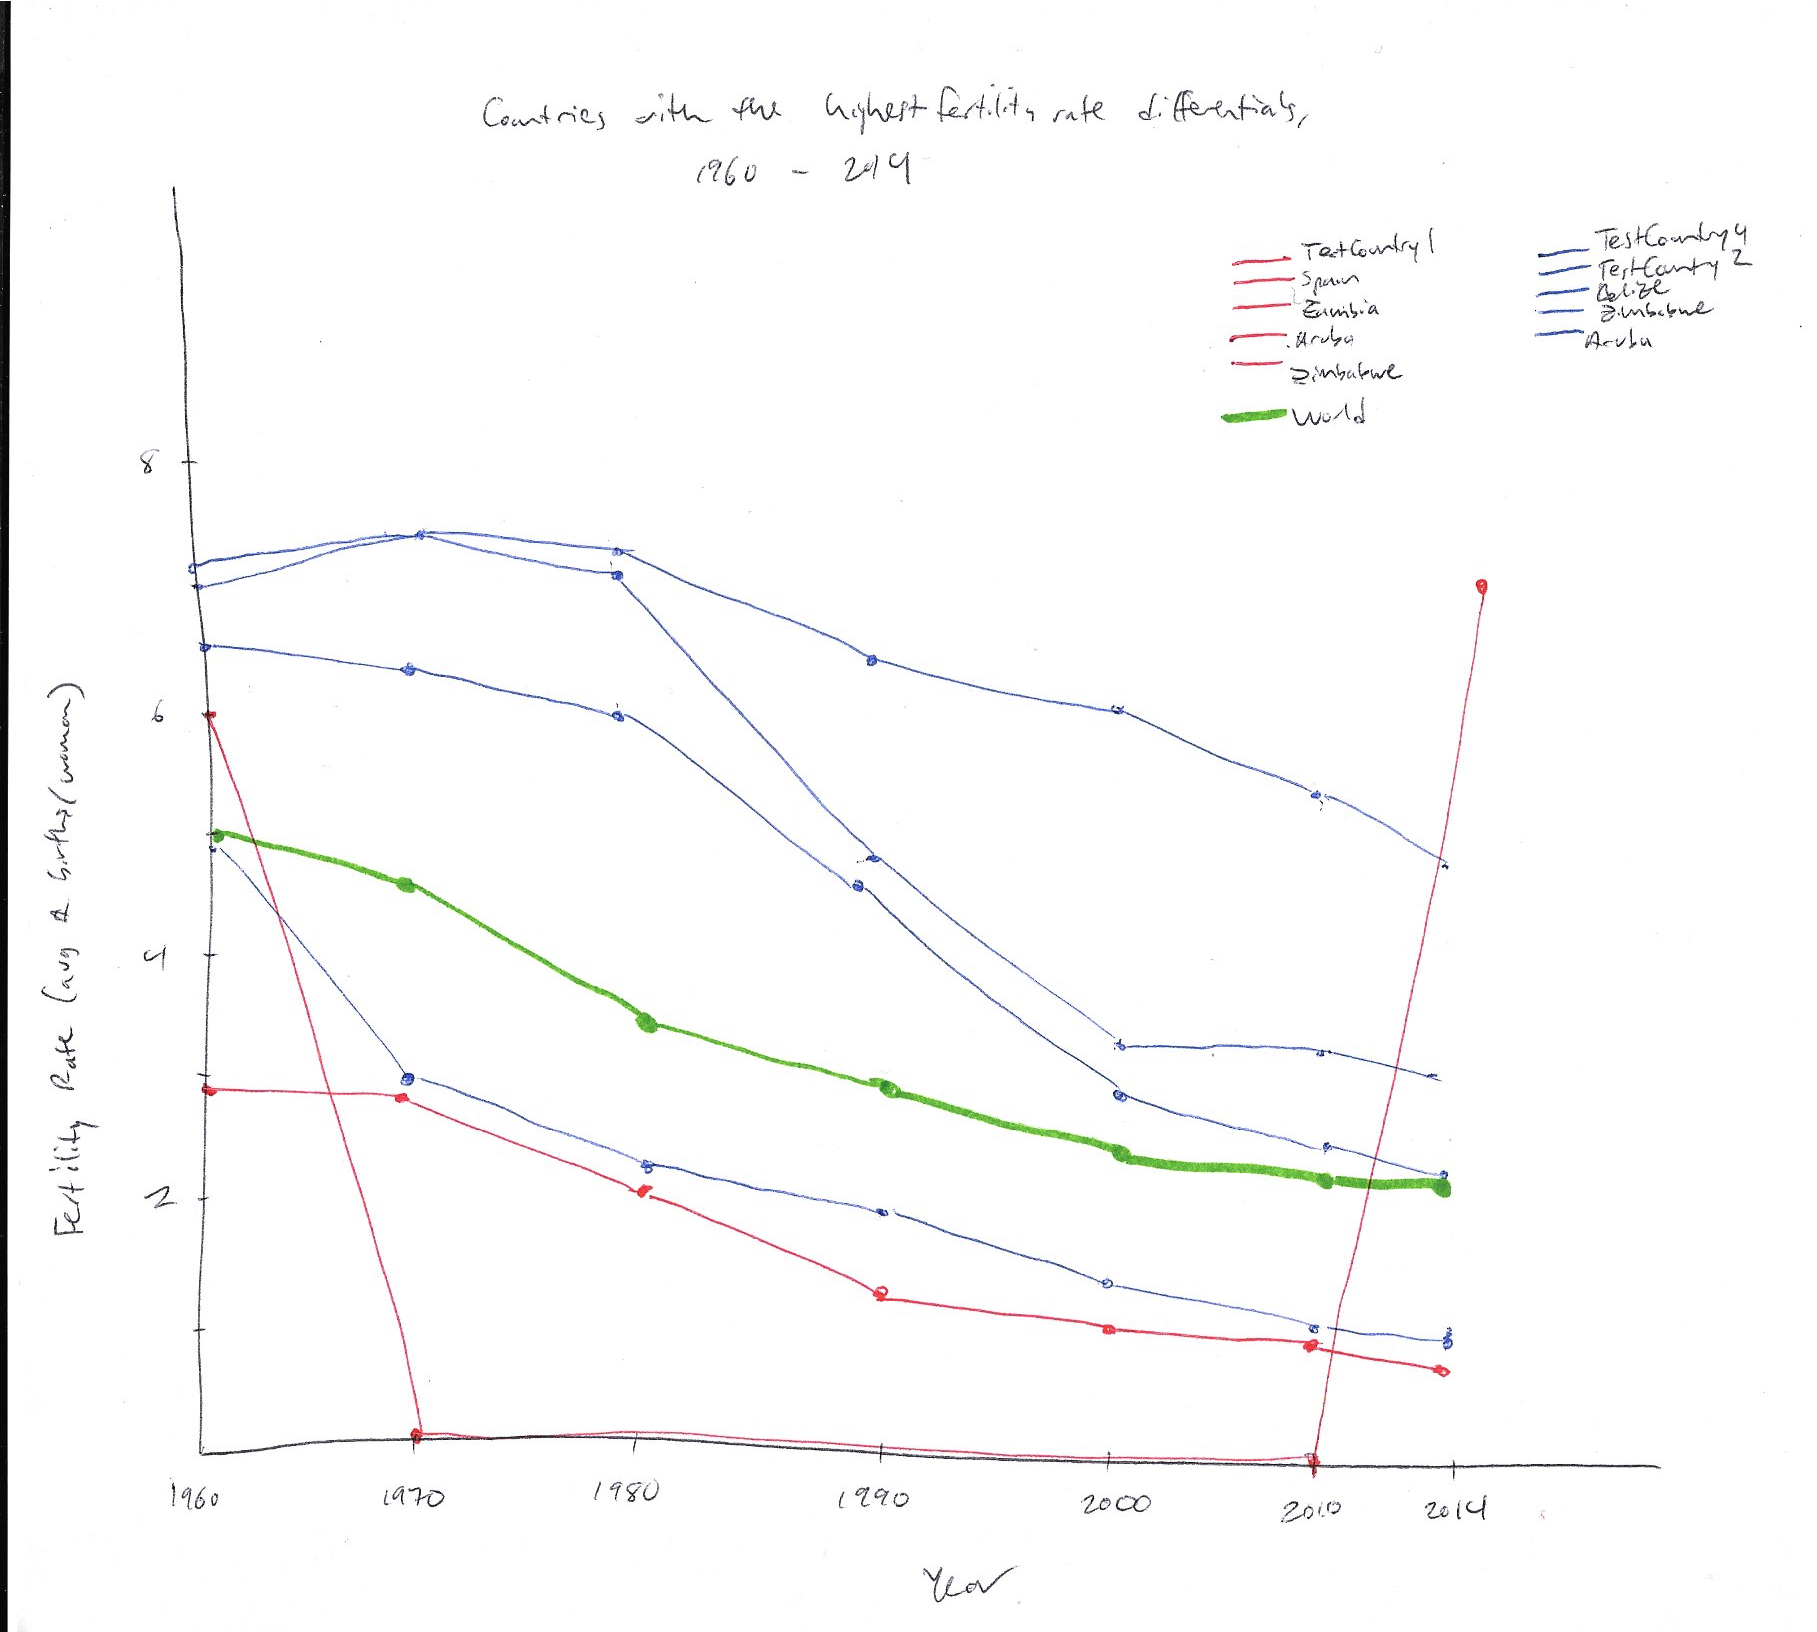

Example 3 should be similar to this:

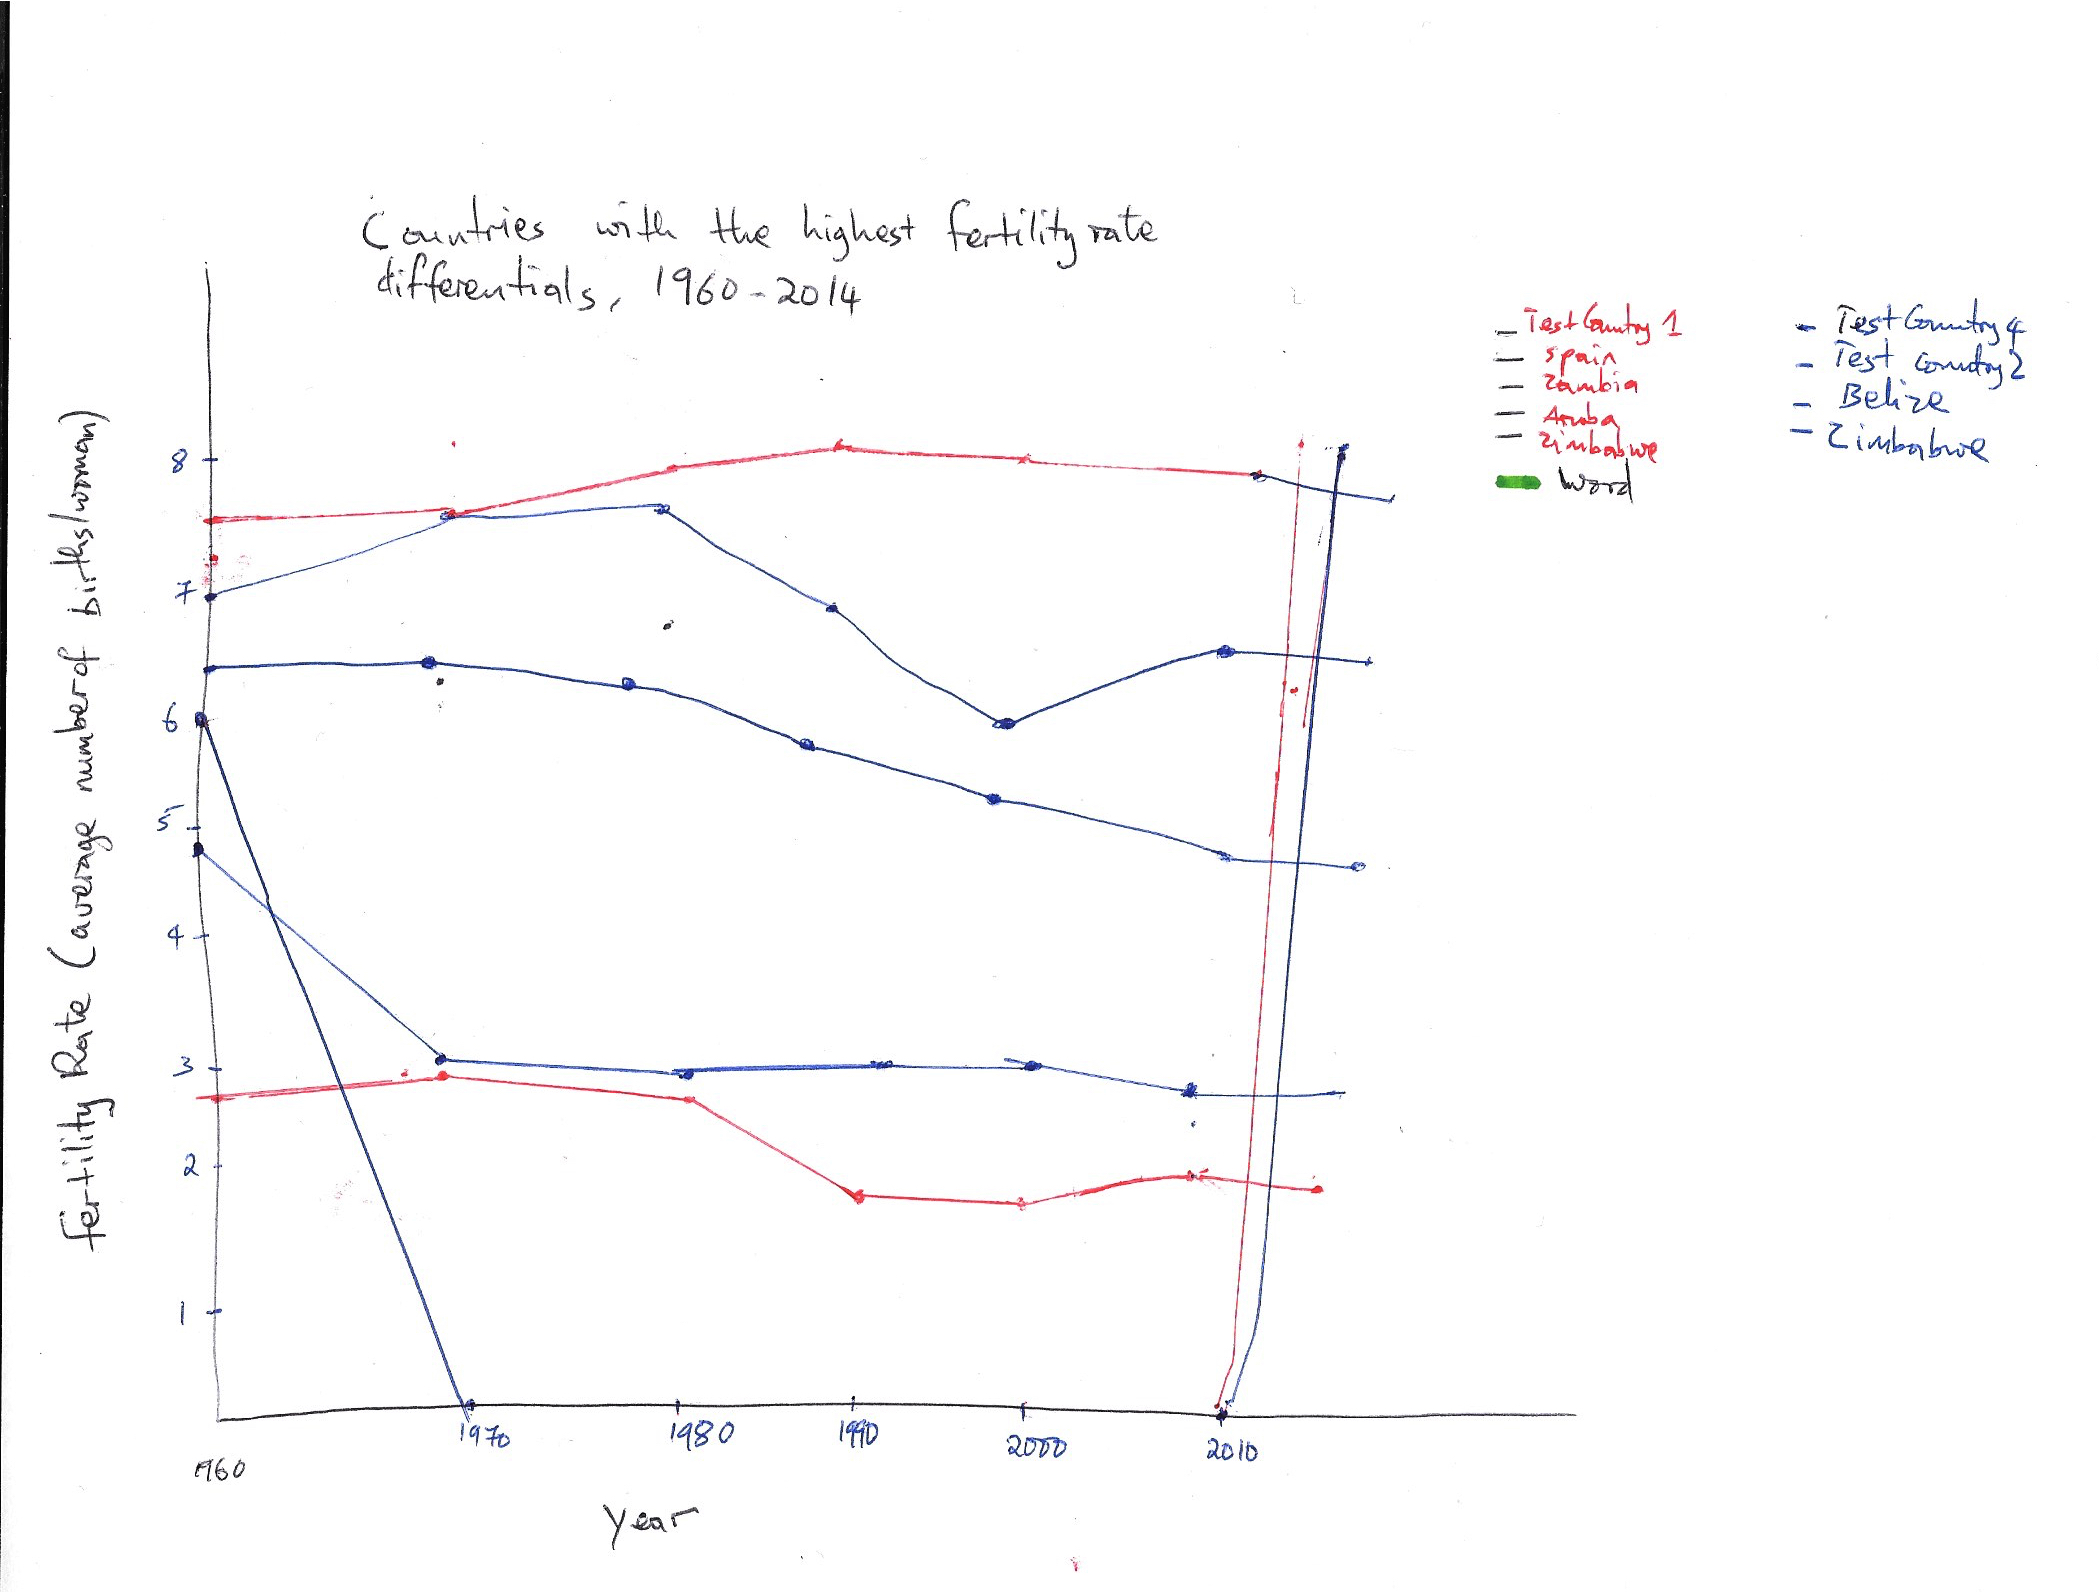

## Main

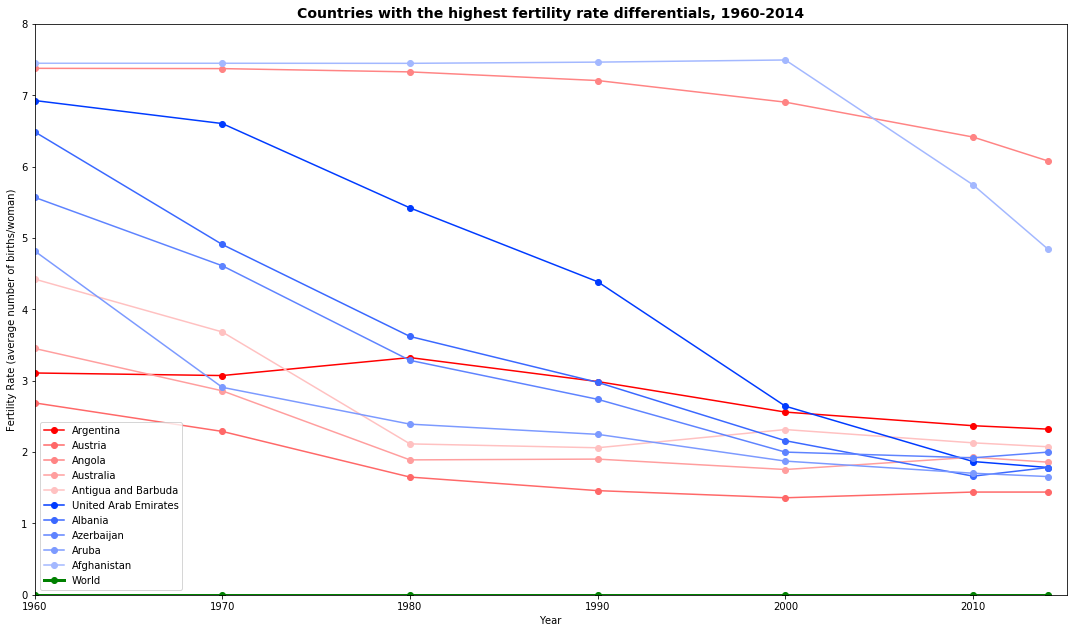

1 of 1 tests passed


In [6]:
@typecheck
def main(filename: str) -> None:
    """
    Consumes a csv filename, analyzes the data (through both analyze_increase and analyze_decrease, and produces a plot of 
    the countries with the 5 greatest fertility rate increases from 1960 to 2014.
    """
    # return [] #stub
    # Template from HtDAF
    
    return plot_fr_differentials(read(filename))
                          
start_testing()

# Modified test file
expect(main("births-per-woman-mod-t3.csv"),None)

summary()

## Results

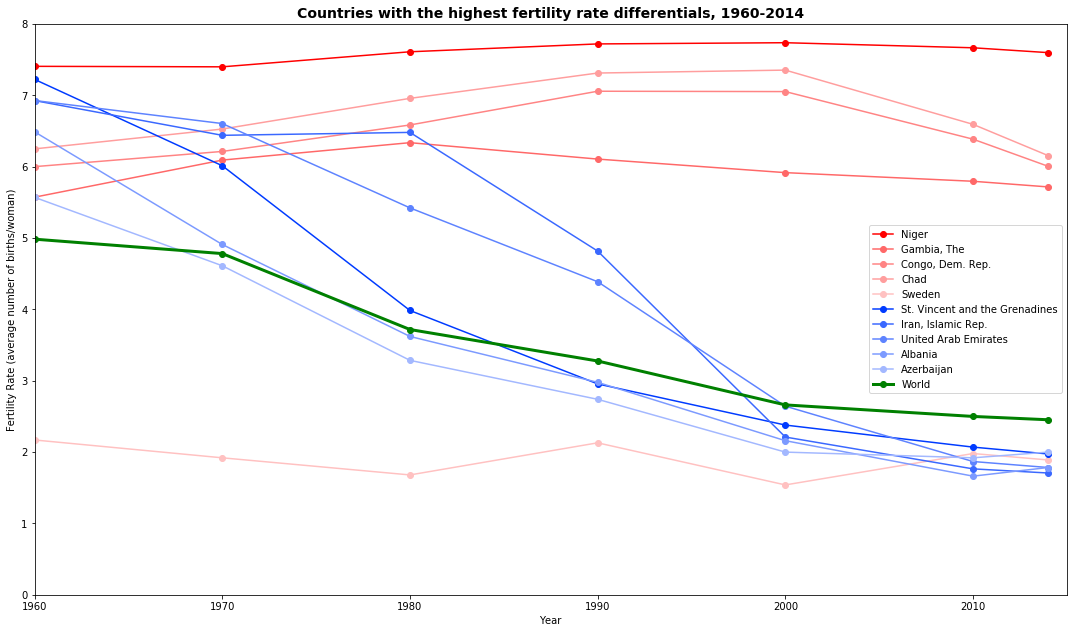

In [7]:
# This call returns the desired graph
main('births-per-woman-mod.csv')

## Constraints

The program will only return the desired graph if the following conditions are met:

  - There are more than 5 rows of data in the csv file.
  - The csv file is modified to add the 'type' column.
  - There is a record for World fertility rates (with country='World').
  - Preferably, there are more than 11 rows of data (including the world) so that each line will be represented
    once.

In [ ]:
a = float('2.2')
b = float('0.7')

round(a-b, 10)
